# Higgs Boson Signal Classification

Classify whether a given signal is from a Higgs boson, or from background noise

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# import NN dependencies
from sklearn.neural_network import MLPClassifier

# import baseline dependencies (like Boosting modesl & Random Forrests)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
# import some evaluation techniques
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_score, precision_recall_curve, average_precision_score, auc
from inspect import signature

In [6]:
# import resampling (since there are just so many data points)
from sklearn.utils import resample

## Data Import & Preprocessing

Since we have such a large dataset (i.e. 11,000,00 ~= 8.6GB) we will just sample the first 100,000 rows for this example.

In [29]:
df = pd.read_csv("data/higgs/HIGGS.csv", nrows=100000)

In [30]:
df.head()

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
1.000000000000000000e+00      100000 non-null float64
8.692932128906250000e-01      100000 non-null float64
-6.350818276405334473e-01     100000 non-null float64
2.256902605295181274e-01      100000 non-null float64
3.274700641632080078e-01      100000 non-null float64
-6.899932026863098145e-01     100000 non-null float64
7.542022466659545898e-01      100000 non-null float64
-2.485731393098831177e-01     100000 non-null float64
-1.092063903808593750e+00     100000 non-null float64
0.000000000000000000e+00      100000 non-null float64
1.374992132186889648e+00      100000 non-null float64
-6.536741852760314941e-01     100000 non-null float64
9.303491115570068359e-01      100000 non-null float64
1.107436060905456543e+00      100000 non-null float64
1.138904333114624023e+00      100000 non-null float64
-1.578198313713073730e+00     100000 non-null float64
-1.046985387802124023e+00 

In [32]:
# rename first column
df = df.rename(columns={"1.000000000000000000e+00": "higgs signal"})

In [33]:
df

,higgs signal,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
5,1.0,0.409391,-1.884684,-1.027292,1.672452,-1.604598,1.338015,0.055427,0.013466,2.173076,...,0.069496,1.377130,3.101961,0.869418,1.222083,1.000627,0.545045,0.698653,0.977314,0.828786
6,1.0,0.933895,0.629130,0.527535,0.238033,-0.966569,0.547811,-0.059439,-1.706866,2.173076,...,1.291248,-1.467454,0.000000,0.901837,1.083671,0.979696,0.783300,0.849195,0.894356,0.774879
7,1.0,1.405144,0.536603,0.689554,1.179567,-0.110061,3.202405,-1.526960,-1.576033,0.000000,...,-0.151202,1.163489,0.000000,1.667071,4.039273,1.175828,1.045352,1.542972,3.534827,2.740754
8,1.0,1.176566,0.104161,1.397002,0.479721,0.265513,1.135563,1.534831,-0.253291,0.000000,...,0.268541,0.530334,0.000000,0.833175,0.773968,0.985750,1.103696,0.849140,0.937104,0.812364
9,1.0,0.945974,1.111244,1.218337,0.907639,0.821537,1.153243,-0.365420,-1.566055,0.000000,...,-0.451018,0.063653,3.101961,0.829024,0.980648,0.994360,0.908248,0.775879,0.783311,0.725122


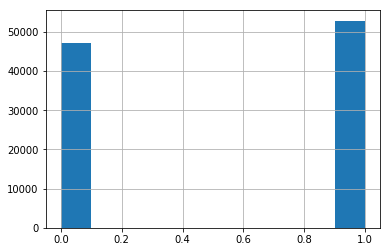

In [34]:
# find distribution

df["higgs signal"].hist()

Great! The data looks balanced. This means that we shouldn't have to re-sample!

## Prepare for Modeling

Now we need to prepare for modeling by setting up a 80% train, 20% test split of our data

In [35]:
target = df["higgs signal"]
features = df.drop(columns=["higgs signal"])

# create train test split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [41]:
def create_auprc_curve(y_test, y_score, title_prefix="model"):
    average_precision = average_precision_score(y_test, y_score)
    
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve for {}: AP={}'.format(
            title_prefix,
            round(average_precision, 2)))
    plt.show()

In [42]:
def create_roc_curve(y_test, y_score, title_prefix="model"):
    
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_score)
    
    # find the area under the roc curve
    auc_score = auc(false_positive_rate, true_positive_rate)
    
    # now plot the curve
    plt.figure()
    lw = 2
    plt.plot(false_positive_rate, true_positive_rate, color='darkred',
             lw=lw, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('2-Class ROC for {}'.format(title_prefix))
    plt.legend(loc="lower right")
    plt.show()

## Baseline Models

To compare our Multi-Layer Perceptron, we'll first create some baseline ensemble models to see what we get for precicion / recall for both train and test.

For the sake of time, we'll just use the default hyperparameters for the models

### Gradient Boosting

In [36]:
gradient_booster = GradientBoostingClassifier()
gradient_booster.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [37]:
# evaluate
gradient_booster.score(X_train, y_train)

0.7187625

In [38]:
cv_score = cross_val_score(gradient_booster, X_train, y_train, cv=5).mean()
print("CV (k=5) score: {}".format(cv_score))

CV (k=5) score: 0.711574953785742


In [40]:
test_score = gradient_booster.score(X_test, y_test)
print("Test score: {}".format(test_score))

Test score: 0.71155


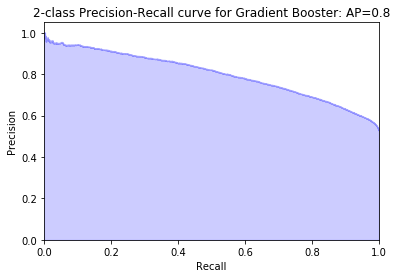

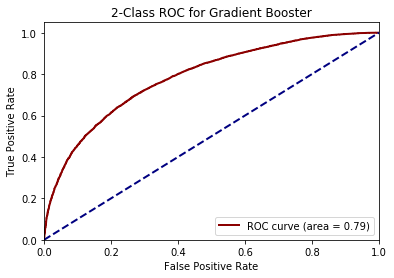

In [49]:
y_score = gradient_booster.decision_function(X_test)

create_auprc_curve(y_test, y_score, title_prefix="Gradient Booster")
create_roc_curve(y_test, y_score, title_prefix="Gradient Booster")

### Random Forrest

In [50]:
random_forrest = RandomForestClassifier()

random_forrest.fit(X_train, y_train)

/Users/ryan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
# evaluate
random_forrest.score(X_train, y_train)

0.9892

In [52]:
cv_score = cross_val_score(random_forrest, X_train, y_train, cv=5).mean()
print("CV (k=5) score: {}".format(cv_score))

CV (k=5) score: 0.6776125568040042


In [53]:
test_score = random_forrest.score(X_test, y_test)
print("Test score: {}".format(test_score))

Test score: 0.6742


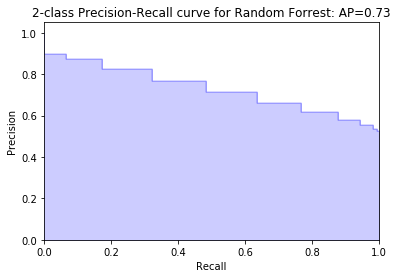

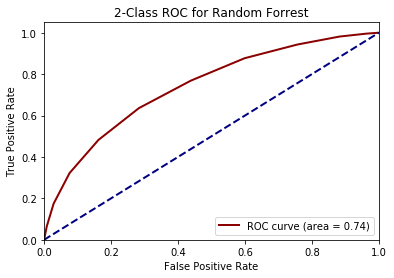

In [60]:
# watch out: This might be wrong
y_score = random_forrest.predict_proba(X_test)[:, 156]

create_auprc_curve(y_test, y_score, title_prefix="Random Forrest")
create_roc_curve(y_test, y_score, title_prefix="Random Forrest")

## Multi-Layer Perceptron Time

Now let's build a multilayer perceptron and see what we can get

In [64]:
mlp1 = MLPClassifier(hidden_layer_sizes=(1000, 21))
mlp1.fit(X_train, y_train)

/Users/ryan/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 21), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
train_score = mlp1.score(X_train, y_train)
test_score = mlp1.score(X_test, y_test)
print("Train Score: {}".format(train_score))
print("Test Score: {}".format(test_score))

Train Score: 0.9563875
Test Score: 0.65145
